# Stefan's Law
Consider Planck's equation for the black body radiation:  
Amount of energy radiated per unit area is given by  
$$B_{\nu}(\nu,T)=\dfrac{8\pi h \nu^3}{c^3}\dfrac{1}{exp\Big(\dfrac{h\nu}{kT}\Big)-1}$$  
Calculate the function for T = 2800 and 5800 K. You may check the calculations by plotting it.  

Take the range of $\nu=1.0\times10^{12}\;Hz\;\;\text{to}\;\;1.0\times10^{16}\;Hz$. Take 10000 data points.  


---



---


### Area under curve

Using trapezoidal rule, calculate the area under the curve for each temperature.  
**Trapezoidal** Rule for approximating integral is given by,  

$$\int_{a}^{b}f(x)dx\approx\dfrac{\Delta x}{2}\Big[f(x_0)+2f(x_1)+2f(x_2)+\cdots+2f(x_{n-1})+f(x_n)\Big],$$  
where $\Delta x=\dfrac{b-a}{n}$ and $x_i=a+i\Delta x.$

Show that $\dfrac{\text{area under curve}}{T^4}=\text{constant}$  

This $\text{constant}\times\dfrac{c}{4}$ gives **Stefan's Constant.**   


---



---

### Efficiency of source
Calculate the area under the curve in the visible range: $4.0\times10^{14}\text{ to }8.0\times10^{14}\;\;Hz$ for each temperature.  
Calculate the ratio of the area in the visible range to area in exercise 2.  

These ratios give the efficiency of incandescent sourves at 2800 K to 5800 K respectively.  

2800 K is typical temperature of filament lamp and 5800 K is surface temperature of Sun.

Part 1: Area under the curve in whole frequency range.

For T = 2800
Area: 0.04649856516706785
Area/T^4 = 7.564973768590537e-16
Stefan's Constant: 5.669805201978201e-08 W.m^(-2)K^(-4)


For T = 5800
Area: 0.8560902458567002
Area/T^4 = 7.564976348303399e-16
Stefan's Constant: 5.66980713542435e-08 W.m^(-2)K^(-4)



Part 2: Index value for energy corresponding to visible frequency range.

start_index: 399
end_index: 799

1. For T = 2800
   Area under curve for visible range: 0.00382507541354531

2. For T = 5800
   Area under curve for visible range: 0.38039220962935477


Part 3: Ratios of area under curve in visible range to whole area under curve

1. For 2800 K the ratio of area under curve for visible range to area under whole range is:

   0.00382507541354531/0.04649856516706785 = 0.08226222464718937

   Therefore, the efficiency of incandescent sources at 2800 is 0.08226222464718937



2. For 5800 K the ratio of area under curve for visible range to area under whole range is:

   0.38

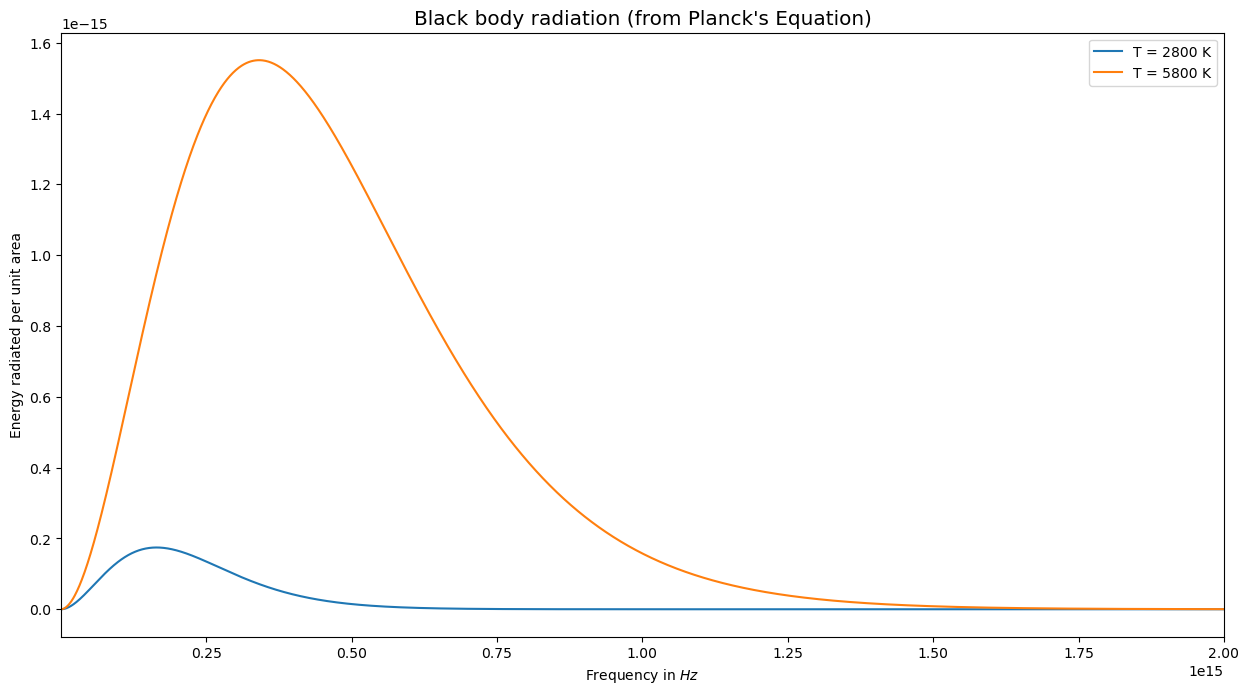

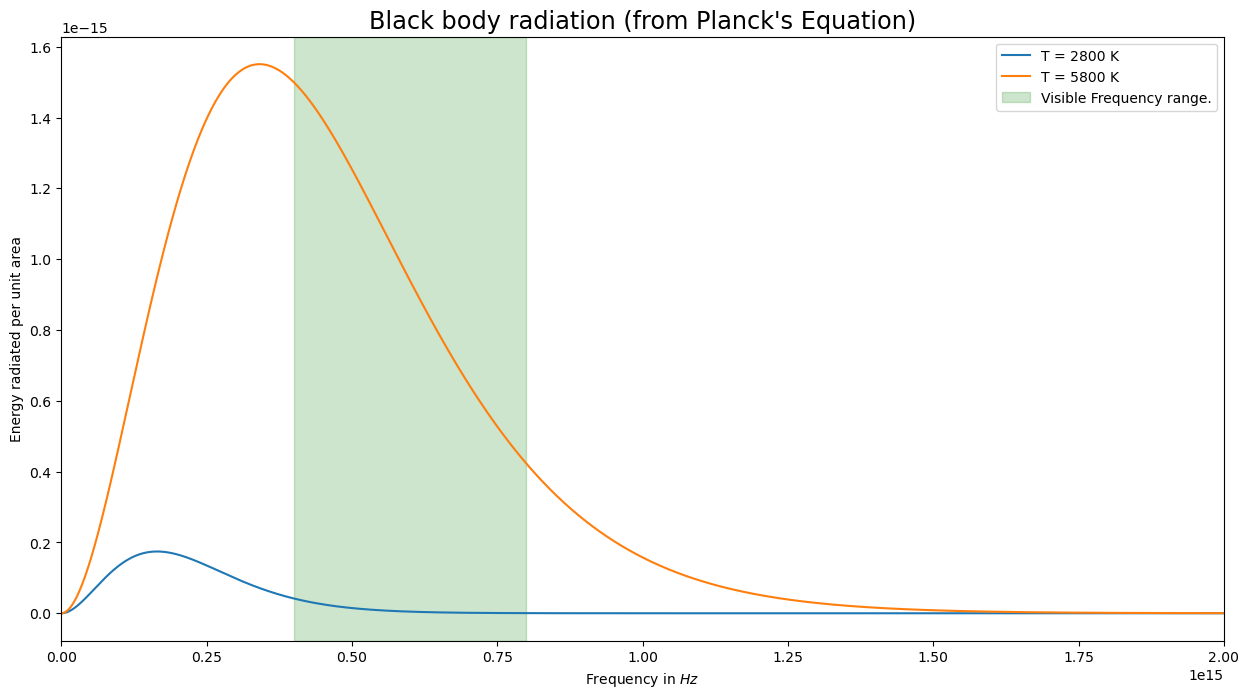

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h,c,k,pi #import constants from scipy

v = np.linspace(1e12,1e16,10000) #frequencies in Hz

T = [2800,5800] # List of temperatures

def energy_radiated(v,T):
    B = (8*pi*h*v**3)/c**3/(np.exp(h*v/k/T)-1)
    return B

y = [[] for i in range(len(T))] # create number of lists equal to number of values of temperatures
for i in range(len(T)):
  for j in range(len(v)):
    y[i].append(energy_radiated(v[j],T[i])) # add energy values corresponding to the freq and temp

x_arr = np.array(v) #convert them to array
y_arr = np.array(y)

#plot in for loop over all temperatures

plt.figure(figsize=(15,8),dpi=100)
for i in range(len(T)): 
    plt.plot(x_arr,y_arr[i],label=f'T = {T[i]} K')
    plt.legend()
    plt.grid(ls=':', lw=1)
    plt.xlim(1e12,2e15)
    plt.xlabel("Frequency in $Hz$")
    plt.ylabel("Energy radiated per unit area")
    plt.title("Black body radiation (from Planck's Equation)",fontsize='x-large')

#------------------------------------------------------------------------------------------------------------------------

# finding area under curve using loop
area = np.zeros(len(T)) # areas under the curve to the corresponding temperature area[0] will correspond to T[0]
dx = (v[-1]-v[0])/len(v) # intervals - maximum from negative index
for i in v:
    for j in range(len(T)):
        if i == v[0] or i==v[-1]: 
            area[j]+=(dx/2)*energy_radiated(i,T[j]) # add first and last element of sum as it is
        else:
            area[j]+=(dx)*energy_radiated(i,T[j]) # rest all the elements times 2

#print the values of areas under the curve of respective temperature and the stefan's constant with the above formula
# put the print function in loop so that changing number of temperature measurements will automatically print the values.
print("Part 1: Area under the curve in whole frequency range.\n")
for k in range(len(T)):
    print(f"For T = {T[k]}") 
    print(f"Area: {area[k]}\nArea/T^4 = {area[k]/T[k]**4}\nStefan's Constant: {(area[k]/T[k]**4)*c/4} W.m^(-2)K^(-4)\n\n")

#--------------------------------------------------------------------------------------------------------------------------

# Calculating the area under the curve in the visible range: 4e14 to 8e14 Hz
# For each temperature.

#Area Under curve:
low_range = 4e14 # Hz
high_range = 8e14 # Hz

#plotting the visible range:
plt.figure(figsize=(15,8),dpi=100)
for i in range(len(T)):
    plt.plot(x_arr,y_arr[i],label=f'T = {T[i]} K')
    plt.legend()
    plt.xlim(0,2e15)
    plt.xlabel("Frequency in $Hz$")
    plt.ylabel("Energy radiated per unit area")
    plt.title("Black body radiation (from Planck's Equation)",fontsize='xx-large')
    plt.grid(ls=':', lw=1)
plt.axvspan(low_range,high_range,color = 'green', alpha=0.2,label="Visible Frequency range.") #Highlight the visible freq
plt.legend()

#-----------------------------------------------------------------------------------------------------------------------------

#Finding out the index value for low_range and high_range:
print("\nPart 2: Index value for energy corresponding to visible frequency range.\n")
for i in range(len(v)):
    if v[i]==low_range:
        start_index = i
        print(f"start_index: {i}")
    elif v[i]==high_range:
        end_index = i
        print(f"end_index: {i}\n")


from scipy.constants import h,c,k,pi

def energy_radiated(v,T):
    radiated_energy = (8*pi*h*v**3)/c**3/(np.exp(h*v/k/T)-1)
    return radiated_energy


dx = (v[end_index]-v[start_index])/(end_index-start_index) #interval
v_visible=v[start_index:end_index+1] #list of visible frequencies
area_visible = np.zeros(len(T)) # list containing number of zeros equal to number of temperature values
for j in range(len(T)):
    for i in v_visible:
        if i == v_visible[0] or i==v_visible[-1]:
            area_visible[j]+=(dx/2)*energy_radiated(i,T[j])
        else:
            area_visible[j]+=(dx)*energy_radiated(i,T[j])

for k in range(len(T)):
    print(f"{k+1}. For T = {T[k]}") 
    print(f"   Area under curve for visible range: {area_visible[k]}\n")

# ratios of areas
print("\nPart 3: Ratios of area under curve in visible range to whole area under curve\n")
for i in range(len(T)):
    print(f"{i+1}. For {T[i]} K the ratio of area under curve for visible range to area under whole range is:\n")
    print(f"   {area_visible[i]}/{area[i]} = {area_visible[i]/area[i]}\n")
    print(f"   Therefore, the efficiency of incandescent sources at {T[i]} is {area_visible[i]/area[i]}\n\n\n")